In [1534]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [1535]:
pd.set_option('display.max_columns', None)

In [1536]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('Sample_Submission.csv')

In [1537]:
train.shape,test.shape,sample.shape

((22500, 13), (52500, 12), (52500, 2))

In [1538]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti 800 Std BSIII,Bangalore,2012,33715,Diesel,Manual,First,16.46 kmpl,1248 CC,100 bhp,5.0,43.65 Lakh,25.53
1,Honda City 1.5 V AT,Delhi,2013,73977,Diesel,Manual,First,18.6 kmpl,2993 CC,61 bhp,4.0,NaN,4.58
2,Honda CR-V RVi MT,Delhi,2007,16460,CNG,Manual,Third,15.3 kmpl,1599 CC,140 bhp,5.0,NaN,2.37
3,Skoda Yeti Ambition 4X2,Kolkata,2009,35048,Petrol,Manual,First,25.47 kmpl,1196 CC,86.8 bhp,5.0,NaN,1.20
4,Hyundai i10 Magna LPG,Coimbatore,2013,41656,Petrol,Automatic,First,19.12 kmpl,1999 CC,115 bhp,7.0,13.26 Lakh,33.04


In [1539]:
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Ford Figo Diesel Titanium,Delhi,2010,48928,Diesel,Automatic,First,17.8 kmpl,1248 CC,258 bhp,7.0,NaN
1,Maruti SX4 VDI,Jaipur,2011,47428,Diesel,Automatic,First,23.9 kmpl,2498 CC,183 bhp,5.0,4.33 Lakh
2,Hyundai Creta 1.6 SX Option,Bangalore,2014,28984,Petrol,Automatic,First,19.59 kmpl,2494 CC,203 bhp,5.0,71.15 Lakh
3,Jeep Compass 2.0 Limited 4X4,Kochi,2017,46735,Petrol,Manual,First,23.9 kmpl,1498 CC,215 bhp,5.0,NaN
4,Maruti Swift Dzire VDI,Kochi,2015,19975,Petrol,Automatic,First,26.6 km/kg,2993 CC,147.8 bhp,7.0,NaN


In [1540]:
sample.head()

,Name,Price
0,Ford Figo Diesel Titanium,NaN
1,Maruti SX4 VDI,NaN
2,Hyundai Creta 1.6 SX Option,NaN
3,Jeep Compass 2.0 Limited 4X4,NaN
4,Maruti Swift Dzire VDI,NaN


In [1541]:
train.Price.mean()

6.359157777777816

In [1542]:
sample.Price = train.Price.mean()

In [1543]:
sample.to_csv('sample1.csv',index=False)

In [1546]:
#Combining the data
combined = pd.concat([train,test],ignore_index=True)

In [1547]:
combined.shape

(75000, 13)

In [1548]:
combined.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti 800 Std BSIII,Bangalore,2012,33715,Diesel,Manual,First,16.46 kmpl,1248 CC,100 bhp,5.0,43.65 Lakh,25.53
1,Honda City 1.5 V AT,Delhi,2013,73977,Diesel,Manual,First,18.6 kmpl,2993 CC,61 bhp,4.0,NaN,4.58
2,Honda CR-V RVi MT,Delhi,2007,16460,CNG,Manual,Third,15.3 kmpl,1599 CC,140 bhp,5.0,NaN,2.37
3,Skoda Yeti Ambition 4X2,Kolkata,2009,35048,Petrol,Manual,First,25.47 kmpl,1196 CC,86.8 bhp,5.0,NaN,1.20
4,Hyundai i10 Magna LPG,Coimbatore,2013,41656,Petrol,Automatic,First,19.12 kmpl,1999 CC,115 bhp,7.0,13.26 Lakh,33.04


In [1549]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               75000 non-null  object 
 1   Location           75000 non-null  object 
 2   Year               75000 non-null  int64  
 3   Kilometers_Driven  75000 non-null  int64  
 4   Fuel_Type          75000 non-null  object 
 5   Transmission       75000 non-null  object 
 6   Owner_Type         75000 non-null  object 
 7   Mileage            74659 non-null  object 
 8   Engine             74894 non-null  object 
 9   Power              74683 non-null  object 
 10  Seats              74662 non-null  float64
 11  New_Price          13066 non-null  object 
 12  Price              22500 non-null  float64
dtypes: float64(2), int64(2), object(9)
memory usage: 7.4+ MB


In [1550]:
combined.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,75000.0,2011.821053,2.685890,2000.00,2010.00,2012.00,2014.00,2018.0
Kilometers_Driven,75000.0,48859.175787,21583.406967,171.00,35710.75,47861.00,59548.25,255022.0
Seats,74662.0,5.356205,0.847848,4.00,5.00,5.00,5.00,8.0
Price,22500.0,6.359158,7.302764,0.44,2.29,3.51,6.59,71.6


In [1551]:
combined.isnull().sum()

Name                     0
Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                341
Engine                 106
Power                  317
Seats                  338
New_Price            61934
Price                52500
dtype: int64

In [1552]:
#null values treatment
combined.Mileage = combined.Mileage.fillna(combined.Mileage.mode()[0])

In [1553]:
combined.Engine.nunique()

146

In [1554]:
combined.Engine = combined.Engine.fillna(combined.Engine.mode()[0])

In [1555]:
combined.Power.nunique()

372

In [1556]:
combined.Power=combined.Power.fillna(combined.Power.mode()[0])

In [1557]:
combined.Seats.nunique()

5

In [1558]:
combined.Seats = combined.Seats.fillna(combined.Seats.mode()[0])

In [1559]:
combined.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti 800 Std BSIII,Bangalore,2012,33715,Diesel,Manual,First,16.46 kmpl,1248 CC,100 bhp,5.0,43.65 Lakh,25.53
1,Honda City 1.5 V AT,Delhi,2013,73977,Diesel,Manual,First,18.6 kmpl,2993 CC,61 bhp,4.0,NaN,4.58
2,Honda CR-V RVi MT,Delhi,2007,16460,CNG,Manual,Third,15.3 kmpl,1599 CC,140 bhp,5.0,NaN,2.37
3,Skoda Yeti Ambition 4X2,Kolkata,2009,35048,Petrol,Manual,First,25.47 kmpl,1196 CC,86.8 bhp,5.0,NaN,1.20
4,Hyundai i10 Magna LPG,Coimbatore,2013,41656,Petrol,Automatic,First,19.12 kmpl,1999 CC,115 bhp,7.0,13.26 Lakh,33.04


In [1560]:
combined[['Mileage','Engine','Power']] = combined[['Mileage','Engine','Power']].replace(to_replace=r'([a-z/]+|[A-Z/]+)', value='', regex=True)

In [1561]:
combined.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [1562]:
combined.Mileage = combined.Mileage.astype(np.number)

In [1563]:
combined.Engine = combined.Engine.astype(np.number)

In [1564]:
combined.Power.unique()

array(['100 ', '61 ', '140 ', '86.8 ', '115 ', '98.6 ', '57.5 ', '78.9 ',
       '121.3 ', ' ', '170 ', '113.98 ', '74 ', '53.3 ', '60 ', '88.8 ',
       '282 ', '147.6 ', '58.2 ', '190 ', '245 ', '68 ', '108.62 ',
       '67.1 ', '63.1 ', '92 ', '58.16 ', '64 ', '88.50 ', '88.73 ',
       '150 ', '73.9 ', '86.7 ', '120 ', '174.5 ', '116.3 ', '75 ',
       '81.86 ', '125 ', '335.3 ', '85 ', '265 ', '99 ', '73.97 ',
       '174.33 ', '98.96 ', '93.7 ', '178.4 ', '67.04 ', '178 ', '107.2 ',
       '126.32 ', '80 ', '138.1 ', '224 ', '55.2 ', '147.8 ', '367 ',
       '118 ', '261 ', '108.5 ', '141 ', '91.1 ', '70 ', '103.2 ',
       '83.1 ', '94 ', '89.84 ', '126.2 ', '168.5 ', '147.51 ', '85.8 ',
       '241.38 ', '63 ', '183 ', '192 ', '444 ', '108.45 ', '105 ',
       '308 ', '82.9 ', '171.5 ', '117.3 ', '255 ', '171 ', '198.5 ',
       '66.1 ', '203 ', '382 ', '82 ', '231.1 ', '130.2 ', '138.03 ',
       '121.36 ', '81.80 ', '100.6 ', '116.6 ', '204 ', '181 ', '110 ',
       '73 ', '9

In [1565]:
combined.Power = combined.Power.replace({'  ':60,' ':60,'':60})

In [1566]:
combined.Power = combined.Power.astype(np.number)

In [1567]:
combined = combined.drop('New_Price',axis = 1)

In [1568]:
combined.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti 800 Std BSIII,Bangalore,2012,33715,Diesel,Manual,First,16.46,1248.0,100.0,5.0,25.53
1,Honda City 1.5 V AT,Delhi,2013,73977,Diesel,Manual,First,18.60,2993.0,61.0,4.0,4.58
2,Honda CR-V RVi MT,Delhi,2007,16460,CNG,Manual,Third,15.30,1599.0,140.0,5.0,2.37
3,Skoda Yeti Ambition 4X2,Kolkata,2009,35048,Petrol,Manual,First,25.47,1196.0,86.8,5.0,1.20
4,Hyundai i10 Magna LPG,Coimbatore,2013,41656,Petrol,Automatic,First,19.12,1999.0,115.0,7.0,33.04


In [1569]:
combined.isnull().sum()

Name                     0
Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                  0
Engine                   0
Power                    0
Seats                    0
Price                52500
dtype: int64

In [1570]:
combined.Year = combined.Year-2000

def chase(x):
    if x<1000:
        return 1000
    else:
        return x

In [1571]:
#combined.Engine = combined.Engine.apply(chase)

In [1572]:
#combined['companyname']=combined.Name.apply(lambda x: x.split()[0])

In [1573]:
combined.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti 800 Std BSIII,Bangalore,12,33715,Diesel,Manual,First,16.46,1248.0,100.0,5.0,25.53
1,Honda City 1.5 V AT,Delhi,13,73977,Diesel,Manual,First,18.60,2993.0,61.0,4.0,4.58
2,Honda CR-V RVi MT,Delhi,7,16460,CNG,Manual,Third,15.30,1599.0,140.0,5.0,2.37
3,Skoda Yeti Ambition 4X2,Kolkata,9,35048,Petrol,Manual,First,25.47,1196.0,86.8,5.0,1.20
4,Hyundai i10 Magna LPG,Coimbatore,13,41656,Petrol,Automatic,First,19.12,1999.0,115.0,7.0,33.04


In [1574]:
combined.Transmission = combined.Transmission.map({'Manual':0, 'Automatic':1})

<AxesSubplot:>

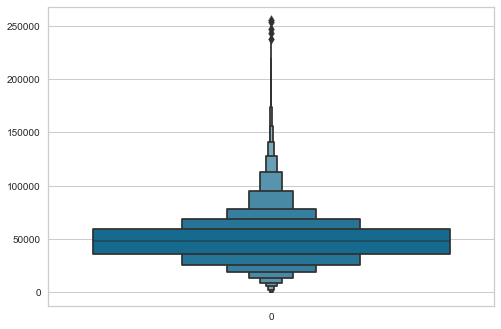

In [1575]:
sns.boxenplot(data=combined.Kilometers_Driven)

In [1576]:
def km(x):
    if x<25000:
        return 0
    elif x<50000:
         return 1
    elif x<100000:
         return 2
    elif x<150000:
         return 3   
    else:
        return 4

In [1577]:
combined.Kilometers_Driven = combined.Kilometers_Driven.apply(km)

<AxesSubplot:xlabel='Kilometers_Driven', ylabel='count'>

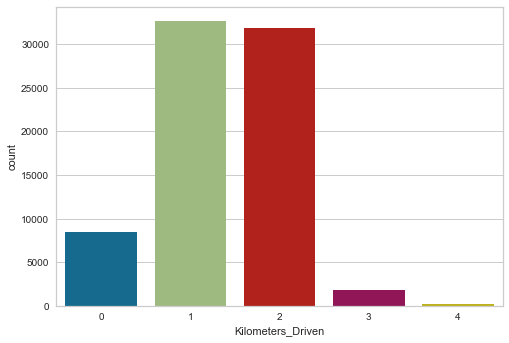

In [1578]:
sns.countplot(combined.Kilometers_Driven)

In [1579]:
#combined['powertoengine_ratio'] = combined.Engine/combined.Power

In [1580]:
#combined = combined.drop(['Power',"Engine"],axis=1)

In [1581]:
combined.Location.unique()

array(['Bangalore', 'Delhi', 'Kolkata', 'Coimbatore', 'Pune', 'Hyderabad',
       'Mumbai', 'Kochi', 'Chennai', 'Jaipur', 'Ahmedabad'], dtype=object)

#combined.Location = combined.Location.map({'Bangalore':'South', 'Delhi':'North', 'Kolkata':'East', 'Coimbatore':'South', 'Pune':'South',
                      'Hyderabad':'South',
       'Mumbai':'South', 'Kochi':'West', 'Chennai':'South', 'Jaipur':'North', 'Ahmedabad':'West'})

In [1583]:
combined.Name.unique()

array(['Maruti 800 Std BSIII', 'Honda City 1.5 V AT', 'Honda CR-V RVi MT',
       ..., 'Hyundai i20 2015-2017 Asta 1.2',
       'Hyundai Santro LP - Euro II', 'Maruti Ertiga VDI Limited Edition'],
      dtype=object)

#data visualization
sns.pairplot(data=combined, diag_kind='kde')
plt.show()

<AxesSubplot:ylabel='count'>

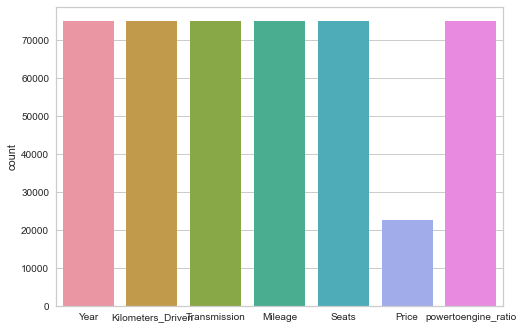

In [1584]:
sns.countplot(data=combined)

In [1585]:
#combined = combined[['Year', 'Mileage', 'Engine', 'Power', 'Seats','Price','Transmission']]

#t =1
for i in combined.select_dtypes('object').columns:
    #plt.subplot
    sns.boxenplot(x = i, y = combined.Price,data=combined)

In [1586]:
dummydata = pd.get_dummies(combined,drop_first=True)

In [1587]:
combined.select_dtypes(np.number).columns

Index(['Year', 'Kilometers_Driven', 'Transmission', 'Mileage', 'Seats',
       'Price', 'powertoengine_ratio'],
      dtype='object')

In [1588]:
newtrain = dummydata[~dummydata.Price.isnull()]
newtest= dummydata[dummydata.Price.isnull()]

In [1376]:
newtrain.shape,newtest.shape

((22500, 1531), (52500, 1531))

# Statistics & unsupervised machine learning

In [1377]:
newtrain.head()

Year  Kilometers_Driven  Transmission  Mileage  Seats  Price  \
0    12                  1             0    16.46    5.0  25.53   
1    13                  2             0    18.60    4.0   4.58   
2     7                  0             0    15.30    5.0   2.37   
3     9                  1             0    25.47    5.0   1.20   
4    13                  1             1    19.12    7.0  33.04   

   powertoengine_ratio  Name_Audi A3 35 TDI Premium  Name_Audi A4 1.8 TFSI  \
0            12.480000                            0                      0   
1            49.065574                            0                      0   
2            11.421429                            0                      0   
3            13.778802                            0                      0   
4            17.382609                            0                      0   

   Name_Audi A4 1.8 TFSI Technology Edition  Name_Audi A4 2.0 TDI  \
0                                         0                     0   
1                                         0                     0   
2                                         0                     0   
3                                         0                     0   
4                                         0                     0   

   Name_Audi A4 2.0 TDI 177 Bhp Premium Plus  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   Name_Audi A4 2.0 TDI 177 Bhp Technology Edition  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Name_Audi A4 2.0 TDI Celebration Edition  Name_Audi A4 2.0 TDI Multitronic  \
0                                         0                                 0   
1                                         0                                 0   
2                                         0                                 0   
3                                         0                                 0   
4                                         0                                 0   

   Name_Audi A4 2.0 TDI Premium Sport Limited Edition  Name_Audi A4 2.0 TFSI  \
0                                                  0                       0   
1                                                  0                       0   
2                                                  0                       0   
3                                                  0                       0   
4                                                  0                       0   

   Name_Audi A4 3.0 TDI Quattro  Name_Audi A4 30 TFSI Premium Plus  \
0                             0                                  0   
1                             0                                  0   
2                             0                                  0   
3                             0                                  0   
4                             0                                  0   

   Name_Audi A4 35 TDI Premium  Name_Audi A4 35 TDI Premium Plus  \
0                            0                                 0   
1                            0                                 0   
2                            0                                 0   
3                            0                                 0   
4                            0                                 0   

   Name_Audi A4 35 TDI Technology  Name_Audi A4 35 TDI Technology Edition  \
0                               0                                       0   
1                               0                                       0   
2                               0                                       0

In [1378]:
dummydata.select_dtypes(np.number).columns

Index(['Year', 'Kilometers_Driven', 'Transmission', 'Mileage', 'Seats',
       'Price', 'powertoengine_ratio', 'Name_Audi A3 35 TDI Premium',
       'Name_Audi A4 1.8 TFSI', 'Name_Audi A4 1.8 TFSI Technology Edition',
       ...
       'Location_North', 'Location_South', 'Location_West', 'Fuel_Type_Diesel',
       'Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Owner_Type_Fourth & Above', 'Owner_Type_Second', 'Owner_Type_Third'],
      dtype='object', length=1531)

In [1385]:
num_col  = ['Year', 'Kilometers_Driven', 'Transmission', 'Mileage', 'Seats', 'powertoengine_ratio']
num_col

['Year',
 'Kilometers_Driven',
 'Transmission',
 'Mileage',
 'Seats',
 'powertoengine_ratio']

In [1386]:
localdata  = newtrain.loc[:,num_col]

In [1387]:
from yellowbrick.cluster import KElbowVisualizer

from sklearn.cluster import KMeans

model = KMeans(random_state=104)

visual = KElbowVisualizer(estimator=model,k=(2,10))


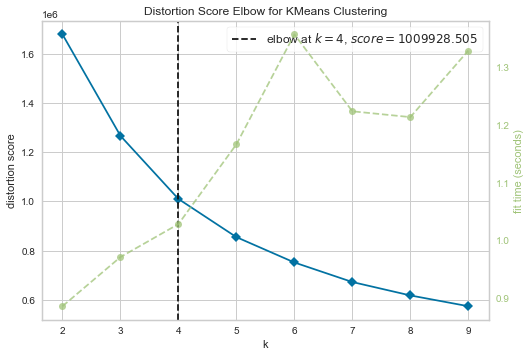

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [1388]:
visual.fit(localdata)
visual.show()

In [1389]:
kmeans = KMeans(n_clusters=4,random_state=144)
newtrain['clusters'] = kmeans.fit_predict(localdata)

In [1390]:
kmeans = KMeans(n_clusters=4,random_state=144)
newtest['clusters'] = kmeans.fit_predict(newtest.loc[:,num_col])

In [1391]:
#apply annova to check
#ho:That the clusters labels have no significance
#ha:That the clusters Labels have significance wrt Target

from statsmodels.formula.api import ols
olsmodel = ols('Price~clusters',data=newtrain).fit()

#print anova table

from statsmodels.stats.anova import anova_lm
print(anova_lm(olsmodel))



               df        sum_sq    mean_sq        F    PR(>F)
clusters      1.0  6.963601e+00   6.963601  0.13057  0.717845
Residual  22498.0  1.199873e+06  53.332417      NaN       NaN


In [1589]:
##

from sklearn.model_selection import train_test_split

X = newtrain.drop('Price',axis=1)
cols =X.columns
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = pd.DataFrame(sc.fit_transform(X),columns=cols)
y= newtrain.Price
#,stratify=newtrain['clusters']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [1590]:
newtest = newtest.drop('Price',axis=1)

In [1591]:
newtrain.shape,y_train.shape,newtest.shape

((22500, 1531), (18000,), (52500, 1530))

In [1592]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

dtree = DecisionTreeRegressor()
dtree.fit(x_train,y_train)
#print('RMSE for {} model is{}'.format('dtree',np.sqrt((y_test,pred_dtree))))

DecisionTreeRegressor()

In [1593]:
pred_dt = dtree.predict(newtest)
print('RMSE for {} model is{}'.format('dtree',np.sqrt(mean_squared_error(y_test, dtree.predict(x_test)))))

RMSE for dtree model is8.906555798960673


In [1530]:
sample.Price = pred_dt

In [1531]:
sample.to_csv('sampledt.csv',index= False)

In [1464]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor()
pred_rf = rf.fit(x_train, y_train).predict(newtest)

print("RMSE for {} model is {}".format('RandomForest', np.sqrt(mean_squared_error(y_test, rf.predict(x_test)))))

KeyboardInterrupt: 

In [ ]:
sample.Price = pred_rf
sample.to_csv('sample4.csv',index= False)

In [1598]:
# light gbm

from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()
pred_lgbm = lgbm.fit(x_train, y_train).predict(newtest)
print("RMSE for {} model is {}".format('lgbm', np.sqrt(mean_squared_error(y_test, lgbm.predict(x_test)))))

RMSE for lgbm model is 6.69740727666631


In [1600]:
sample.Price = pred_lgbm
sample.to_csv('sample20.csv',index= False)

In [1069]:
#xg
from xgboost import XGBRegressor
xgb = XGBRegressor()
pred_xgbm = xgb.fit(x_train, y_train).predict(newtest)
print("RMSE for {} model is {}".format('XGBM', np.sqrt(mean_squared_error(y_test, xgb.predict(x_test)))))

KeyboardInterrupt: 

In [949]:
sample.Price = pred_xgbm
sample.to_csv('sample8.csv',index= False)

In [953]:
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor

kfold = KFold(n_splits = 5,shuffle = True)

lgbm = LGBMRegressor(learning_rate= 0.12, max_depth=3, n_estimators= 200)
pred_model = pd.DataFrame()

n =10
for i in range(n):
    folds = next(kfold.split(X))
    xtrain = X.iloc[folds[0]]
    ytrain = y.iloc[folds[0]]
    pred_model[i] = lgbm.fit(x_train, y_train).predict(newtest)
    
    
vals = pred_model.median(axis=1)
print("RMSE for {} model is {}:".format("10CV",
                                       np.sqrt(mean_squared_error(y_test,
                                                                 lgbm.predict(x_test)))))

RMSE for 10CV model is 6.305449613936411:


In [955]:
vals = pred_model.mean(axis=1)
print("RMSE for {} model is {}:".format("10CV",
                                       np.sqrt(mean_squared_error(y_test,
                                                                 lgbm.predict(x_test)))))

RMSE for 10CV model is 6.305449613936411:


In [956]:
sample.Price = vals
sample.to_csv('sample9gbr.csv',index= False)

In [957]:
level_0 =  [('dtree', dtree),('rf', rf), ('XGBM', xgb), ('LGBM', lgbm) ]

In [958]:
from sklearn.ensemble import StackingRegressor

In [959]:
stack = StackingRegressor(estimators= level_0, final_estimator= lgbm)

pred_model = pd.DataFrame()

n =10
for i in range(n):
    folds = next(kfold.split(X))
    xtrain = X.iloc[folds[0]]
    ytrain = y.iloc[folds[0]]
    pred_model[i] = gbm.fit(x_train, y_train).predict(newtest)
    
    
vals = pred_model.median(axis=1)
#print("RMSE for {} model is {}:".format("Stacking Model",
                                       #np.sqrt(mean_squared_error(ytest,
                                       #                          gmb.predict(Xtest)))))

In [498]:
sample.Price = vals
sample.to_csv('sample10r.csv',index= False)      #7.1

In [ ]:
#now hyperparameter tunning

In [506]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [503]:
param = {'n_neighbors':[5,7,9,12]}
gscv = GridSearchCV(estimator=KNeighborsRegressor(),param_grid=param,scoring = 'r2',verbose=3,cv=3)

In [504]:

def model_results(model,x_train,y_train,x_test,y_test):
    print(str(model))
    n = x_train.shape[0]
    p = x_train.shape[1]
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test,y_pred)
    adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    print('R2 :\t',r2)
    print('Adj R2:\t',adj_r2)
    print('MSE:\t',mean_squared_error(y_test,y_pred))
    print('RMSE:\t',(mean_squared_error(y_test,y_pred))**0.5,'\n')

In [507]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train_s = sc.fit_transform(x_train)
x_test_s = sc.transform(x_test)

model_results(KNeighborsRegressor(n_neighbors=7),x_train_s,y_train,x_test_s,y_test)

KNeighborsRegressor(n_neighbors=7)
R2 :	 -0.024567071577985322
Adj R2:	 -0.12036347031179573
MSE:	 55.82363978276644
RMSE:	 7.4715219187770865 



In [950]:
param = {'max_depth':[1,2,3,4,5,7,9,12] ,'learning_rate':[0.1,0.001,0.2,0.12,], 'n_estimators':[100,200,300,400,500]}
gscv = GridSearchCV(estimator=LGBMRegressor(),param_grid=param,scoring = 'r2',verbose=3,cv=3)

In [951]:
gscv.fit(x_train,y_train)

Fitting 3 folds for each of 160 candidates, totalling 480 fits
[CV 1/3] END learning_rate=0.1, max_depth=1, n_estimators=100;, score=0.205 total time=   1.4s
[CV 2/3] END learning_rate=0.1, max_depth=1, n_estimators=100;, score=0.208 total time=   1.3s
[CV 3/3] END learning_rate=0.1, max_depth=1, n_estimators=100;, score=0.194 total time=   1.7s
[CV 1/3] END learning_rate=0.1, max_depth=1, n_estimators=200;, score=0.209 total time=   1.6s
[CV 2/3] END learning_rate=0.1, max_depth=1, n_estimators=200;, score=0.213 total time=   2.1s
[CV 3/3] END learning_rate=0.1, max_depth=1, n_estimators=200;, score=0.197 total time=   1.4s
[CV 1/3] END learning_rate=0.1, max_depth=1, n_estimators=300;, score=0.211 total time=   1.5s
[CV 2/3] END learning_rate=0.1, max_depth=1, n_estimators=300;, score=0.216 total time=   2.2s
[CV 3/3] END learning_rate=0.1, max_depth=1, n_estimators=300;, score=0.200 total time=   1.3s
[CV 1/3] END learning_rate=0.1, max_depth=1, n_estimators=400;, score=0.212 total 

[CV 3/3] END learning_rate=0.1, max_depth=7, n_estimators=400;, score=0.185 total time=   2.1s
[CV 1/3] END learning_rate=0.1, max_depth=7, n_estimators=500;, score=0.176 total time=   2.3s
[CV 2/3] END learning_rate=0.1, max_depth=7, n_estimators=500;, score=0.207 total time=   2.1s
[CV 3/3] END learning_rate=0.1, max_depth=7, n_estimators=500;, score=0.176 total time=   2.0s
[CV 1/3] END learning_rate=0.1, max_depth=9, n_estimators=100;, score=0.207 total time=   1.5s
[CV 2/3] END learning_rate=0.1, max_depth=9, n_estimators=100;, score=0.229 total time=   1.4s
[CV 3/3] END learning_rate=0.1, max_depth=9, n_estimators=100;, score=0.208 total time=   1.4s
[CV 1/3] END learning_rate=0.1, max_depth=9, n_estimators=200;, score=0.192 total time=   1.6s
[CV 2/3] END learning_rate=0.1, max_depth=9, n_estimators=200;, score=0.221 total time=   1.8s
[CV 3/3] END learning_rate=0.1, max_depth=9, n_estimators=200;, score=0.197 total time=   1.6s
[CV 1/3] END learning_rate=0.1, max_depth=9, n_est

[CV 2/3] END learning_rate=0.001, max_depth=4, n_estimators=300;, score=0.088 total time=   1.5s
[CV 3/3] END learning_rate=0.001, max_depth=4, n_estimators=300;, score=0.087 total time=   1.4s
[CV 1/3] END learning_rate=0.001, max_depth=4, n_estimators=400;, score=0.109 total time=   1.7s
[CV 2/3] END learning_rate=0.001, max_depth=4, n_estimators=400;, score=0.108 total time=   1.9s
[CV 3/3] END learning_rate=0.001, max_depth=4, n_estimators=400;, score=0.106 total time=   1.9s
[CV 1/3] END learning_rate=0.001, max_depth=4, n_estimators=500;, score=0.125 total time=   1.8s
[CV 2/3] END learning_rate=0.001, max_depth=4, n_estimators=500;, score=0.125 total time=   1.7s
[CV 3/3] END learning_rate=0.001, max_depth=4, n_estimators=500;, score=0.121 total time=   1.7s
[CV 1/3] END learning_rate=0.001, max_depth=5, n_estimators=100;, score=0.038 total time=   1.4s
[CV 2/3] END learning_rate=0.001, max_depth=5, n_estimators=100;, score=0.037 total time=   1.4s
[CV 3/3] END learning_rate=0.0

[CV 3/3] END learning_rate=0.2, max_depth=2, n_estimators=100;, score=0.208 total time=   1.1s
[CV 1/3] END learning_rate=0.2, max_depth=2, n_estimators=200;, score=0.217 total time=   1.2s
[CV 2/3] END learning_rate=0.2, max_depth=2, n_estimators=200;, score=0.231 total time=   1.2s
[CV 3/3] END learning_rate=0.2, max_depth=2, n_estimators=200;, score=0.209 total time=   1.1s
[CV 1/3] END learning_rate=0.2, max_depth=2, n_estimators=300;, score=0.215 total time=   1.2s
[CV 2/3] END learning_rate=0.2, max_depth=2, n_estimators=300;, score=0.231 total time=   1.2s
[CV 3/3] END learning_rate=0.2, max_depth=2, n_estimators=300;, score=0.210 total time=   1.2s
[CV 1/3] END learning_rate=0.2, max_depth=2, n_estimators=400;, score=0.213 total time=   1.3s
[CV 2/3] END learning_rate=0.2, max_depth=2, n_estimators=400;, score=0.232 total time=   1.4s
[CV 3/3] END learning_rate=0.2, max_depth=2, n_estimators=400;, score=0.210 total time=   1.2s
[CV 1/3] END learning_rate=0.2, max_depth=2, n_est

[CV 3/3] END learning_rate=0.2, max_depth=9, n_estimators=500;, score=0.106 total time=   2.2s
[CV 1/3] END learning_rate=0.2, max_depth=12, n_estimators=100;, score=0.178 total time=   1.9s
[CV 2/3] END learning_rate=0.2, max_depth=12, n_estimators=100;, score=0.205 total time=   1.3s
[CV 3/3] END learning_rate=0.2, max_depth=12, n_estimators=100;, score=0.186 total time=   1.3s
[CV 1/3] END learning_rate=0.2, max_depth=12, n_estimators=200;, score=0.147 total time=   1.5s
[CV 2/3] END learning_rate=0.2, max_depth=12, n_estimators=200;, score=0.179 total time=   1.5s
[CV 3/3] END learning_rate=0.2, max_depth=12, n_estimators=200;, score=0.160 total time=   1.5s
[CV 1/3] END learning_rate=0.2, max_depth=12, n_estimators=300;, score=0.125 total time=   1.7s
[CV 2/3] END learning_rate=0.2, max_depth=12, n_estimators=300;, score=0.155 total time=   1.7s
[CV 3/3] END learning_rate=0.2, max_depth=12, n_estimators=300;, score=0.134 total time=   1.8s
[CV 1/3] END learning_rate=0.2, max_depth

[CV 2/3] END learning_rate=0.12, max_depth=5, n_estimators=400;, score=0.218 total time=   1.8s
[CV 3/3] END learning_rate=0.12, max_depth=5, n_estimators=400;, score=0.195 total time=   1.7s
[CV 1/3] END learning_rate=0.12, max_depth=5, n_estimators=500;, score=0.188 total time=   1.6s
[CV 2/3] END learning_rate=0.12, max_depth=5, n_estimators=500;, score=0.214 total time=   1.7s
[CV 3/3] END learning_rate=0.12, max_depth=5, n_estimators=500;, score=0.189 total time=   1.6s
[CV 1/3] END learning_rate=0.12, max_depth=7, n_estimators=100;, score=0.211 total time=   1.2s
[CV 2/3] END learning_rate=0.12, max_depth=7, n_estimators=100;, score=0.232 total time=   1.2s
[CV 3/3] END learning_rate=0.12, max_depth=7, n_estimators=100;, score=0.211 total time=   1.3s
[CV 1/3] END learning_rate=0.12, max_depth=7, n_estimators=200;, score=0.197 total time=   1.4s
[CV 2/3] END learning_rate=0.12, max_depth=7, n_estimators=200;, score=0.224 total time=   1.4s
[CV 3/3] END learning_rate=0.12, max_dep

GridSearchCV(cv=3, estimator=LGBMRegressor(),
             param_grid={'learning_rate': [0.1, 0.001, 0.2, 0.12],
                         'max_depth': [1, 2, 3, 4, 5, 7, 9, 12],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='r2', verbose=3)

In [952]:
gscv.best_params_

{'learning_rate': 0.12, 'max_depth': 4, 'n_estimators': 100}

In [ ]:
#Using boosting algorithm

In [534]:
model_results(GradientBoostingRegressor(n_estimators=150,max_depth=9),x_train,y_train,x_test,y_test)

GradientBoostingRegressor(max_depth=9, n_estimators=150)
R2 :	 0.1302086959356984
Adj R2:	 0.04888373743296692
MSE:	 47.39066654707776
RMSE:	 6.884087924124572 



# Best performing model is LGBMRegressor 
with parameters {'learning_rate': 0.12, 'max_depth': 4, 'n_estimators': 100}

In [1599]:
# light gbm

from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(learning_rate= 0.12, max_depth=4, n_estimators= 100)
pred_lgbm = lgbm.fit(x_train, y_train).predict(newtest)
print("RMSE for {} model is {}".format('lgbm', np.sqrt(mean_squared_error(y_test, lgbm.predict(x_test)))))

RMSE for lgbm model is 6.661336459066909


In [484]:
sample.Price = pred_lgbm
sample.to_csv('sample7.csv',index= False)